In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ujipenchars2
import string
from preprocessing import DrawingToBoxScaler, VideoCreator
from hosvdclassifier import HOSVDClassifier
from classifier_pickle import HOSVDPickle

# Klasifikacija znamenki HOSVD-om koristeći video

In [2]:
train, test = ujipenchars2.Parser('data/ujipenchars2').parse(string.digits)
data = train + test
train_idx = np.array(range(len(train)))
test_idx = np.array(range(len(train), len(data)))
labels = np.array([drawing.label for drawing in data])

len(train), len(test)

(800, 400)

In [3]:
def plot_images(images: np.ndarray):
    n = len(images)
    plt.figure(figsize=(3*n, 3))

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap="binary", vmin=0, vmax=255)
        axes = plt.gca().axes
        axes.xaxis.set_ticks([])
        axes.yaxis.set_ticks([])

    plt.show()

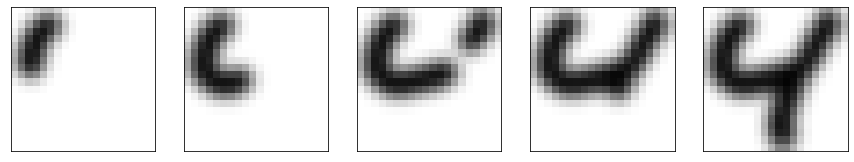

In [4]:
# Preprocessing
drawing_scaler = DrawingToBoxScaler(0, 1, 0, 1)
data = drawing_scaler.transform(data)

# Izrada videa
video_creator = VideoCreator(n=5, clip=(-0.15, 1.15, -0.15, 1.15), size=(20, 20))
videos = video_creator.transform(data)

plot_images(video_creator.transform_one(data[8]))

In [5]:
%%time
cls = HOSVDClassifier([440]*4)
cls.fit(videos[train_idx], labels[train_idx])
cls.score(videos[test_idx], labels[test_idx])

CPU times: user 23.3 s, sys: 1min, total: 1min 23s
Wall time: 5.51 s


0.9725

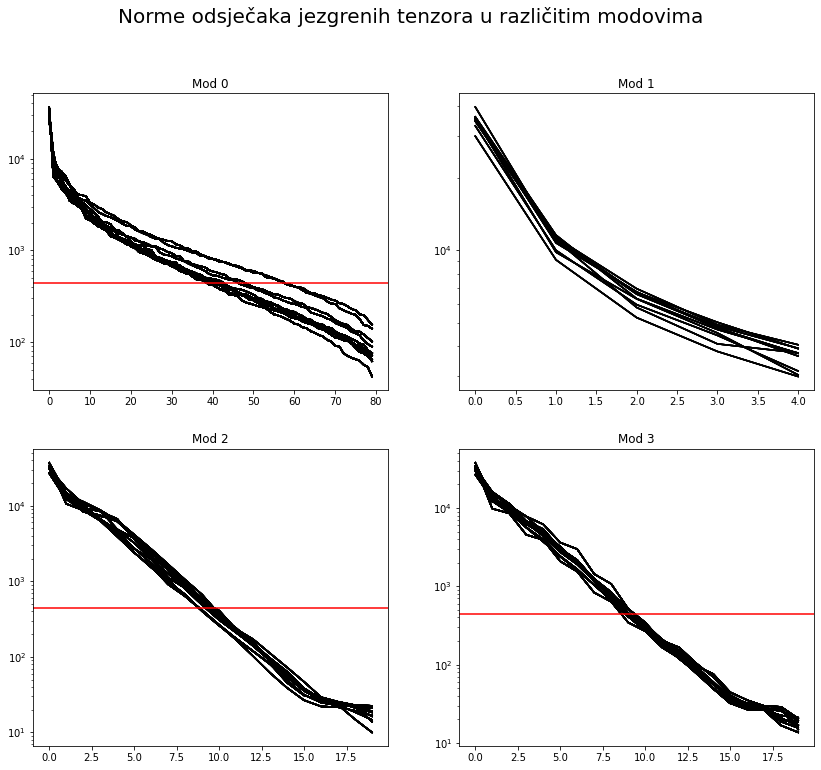

In [6]:
cls.plot_cuts()

In [7]:
# Spremimo HOSVD model:
HOSVDPickle(
    transformers=[drawing_scaler, video_creator],
    cls=cls
).save('models/HOSVD-Video.pickle')

# Klasifikacija koristeći slike nacrtanih znamenki

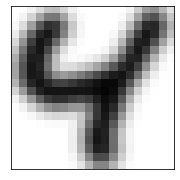

In [8]:
# Izrada slika
image_creator = VideoCreator(n=1, clip=(-0.15, 1.15, -0.15, 1.15), size=(20, 20))
images = image_creator.transform(data)

plot_images(image_creator.transform_one(data[8]))

In [9]:
%%time

cls = HOSVDClassifier([1100]*4)
cls.fit(images[train_idx], labels[train_idx])
cls.score(images[test_idx], labels[test_idx])

CPU times: user 7.13 s, sys: 19.7 s, total: 26.8 s
Wall time: 1.86 s


0.925

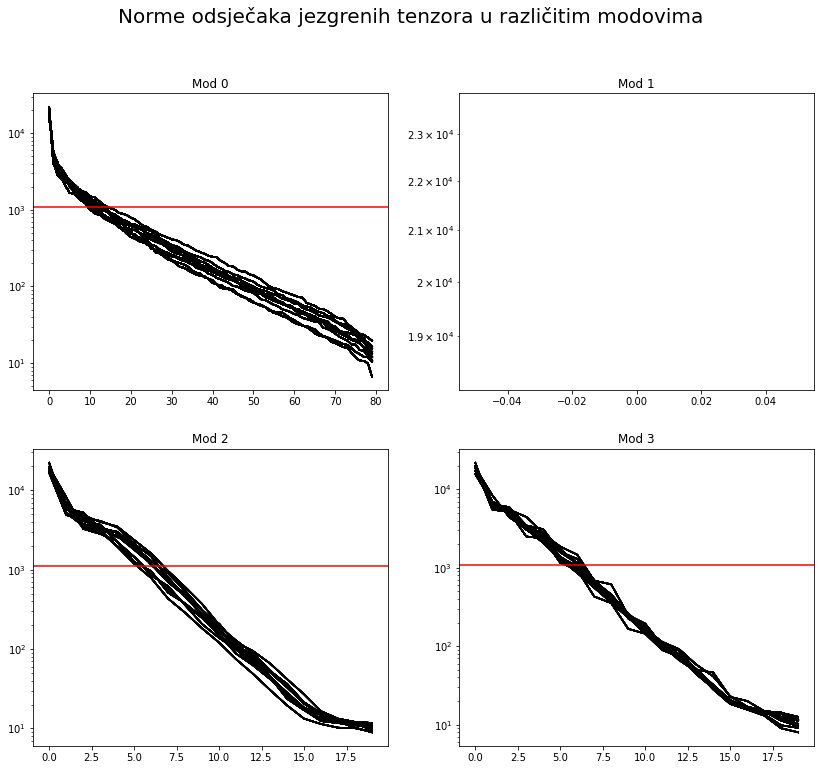

In [10]:
cls.plot_cuts()

In [11]:
# Spremimo HOSVD model:
HOSVDPickle(
    transformers=[drawing_scaler, image_creator],
    cls=cls
).save('models/HOSVD-Image.pickle')

# Isprobajmo HOSVDClassifier na MNIST (train=3000, test=1000):

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.reshape((-1,  28, 28))
y = y.astype(np.int8)

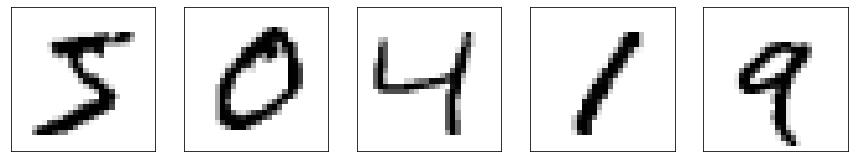

In [13]:
plot_images(X.reshape((-1,  28, 28))[:5])

In [14]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3000, test_size=1000)

In [15]:
%%time
cls = HOSVDClassifier([2000]*3)
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

CPU times: user 44.8 s, sys: 1min 39s, total: 2min 24s
Wall time: 9.56 s


0.954

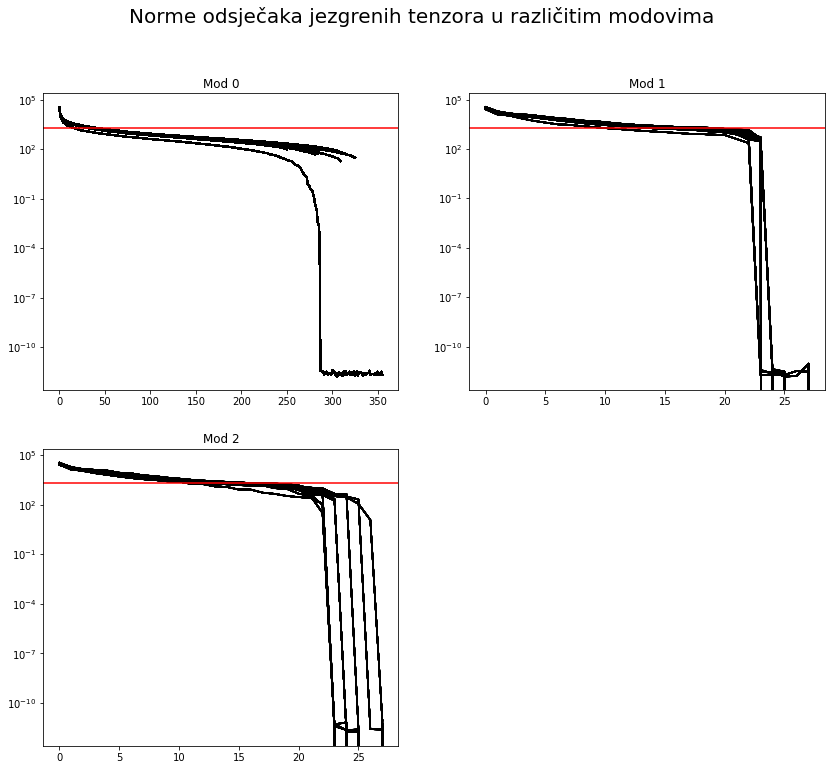

In [16]:
cls.plot_cuts()